# Exercise: palmerpenguins -  Régression Logistique

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
filename = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/palmer_penguins.csv"
data = pd.read_csv(filename)

In [8]:
# numérisation de la ariable 'sex'

data.loc[data.sex == 'male', 'sex'] = 0
data.loc[data.sex == 'female', 'sex'] = 1
data.dropna(inplace=True)
data['sex'] = data.sex.astype('int')

data['sex'].value_counts()

sex
0    168
1    165
Name: count, dtype: int64

In [12]:
# normalisation des valeurs

scaler = MinMaxScaler()
X = scaler.fit_transform(data[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']])
y = data['sex'].values

In [18]:
# split du modèle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [22]:
clf = LogisticRegression(random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[28,  3],
       [ 6, 30]])

In [30]:
from sklearn.metrics import recall_score, precision_score

print("Recall score: ", recall_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred))

Recall score:  0.8333333333333334
Precision score:  0.9090909090909091


Le modèle est meilleur pour minimiser l'erreur : male => female, les faux positifs.

## Calcule des probabilités et variation des seuils

In [34]:
y_proba = clf.predict_proba(X_test)[:,1]
y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_proba ]
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_proba ]

In [42]:
confusion_matrix(y_test, y_pred_03) #il y a plus de possibilité qu'on arrondi à 1 donc ça reduit les faux négatifs (1)

array([[22,  9],
       [ 1, 35]])

In [44]:
confusion_matrix(y_test, y_pred_07) #il y a plus de possibilité qu'on arrondi à 0 donc ça reduit les faux positifs (1)

array([[30,  1],
       [18, 18]])

## Numérisation des variables non numeriques 

In [53]:
data.loc[data.species == 'Adelie', 'species'] = 3
data.loc[data.species == 'Gentoo', 'species'] = 2
data.loc[data.species == 'Chinstrap', 'species'] = 1
data['species'] = data.species.astype('int')
data['species'].value_counts()

species
3    146
2    119
1     68
Name: count, dtype: int64

In [55]:
scaler = MinMaxScaler()
y = data['species'].values

In [73]:
# Modèle X1 avec le poids
X1 = scaler.fit_transform(data[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.20, random_state=42)

In [75]:
# Modèle X2 sans le poids
X2 = scaler.fit_transform(data[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.20, random_state=42)

In [77]:
clf1 = LogisticRegression(random_state = 42)
clf1.fit(X1_train, y1_train)
clf2 = LogisticRegression(random_state = 42)
clf2.fit(X2_train, y2_train)

y1_pred = clf1.predict(X1_test)
y2_pred = clf2.predict(X2_test)

print(confusion_matrix(y1_test, y1_pred))
print(confusion_matrix(y2_test, y2_pred))

[[16  0  2]
 [ 0 18  0]
 [ 0  0 31]]
[[16  0  2]
 [ 0 18  0]
 [ 0  0 31]]


Au vu des résultats de classification nous n'avions pas forcément besoin du poids ("body_mass_g") pour prédire leur espèce.

# Exercise: palmerpenguins -  Clustering - K-means

In [87]:
X = data[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g','sex']]

from sklearn.cluster import KMeans
km = KMeans( n_clusters=3, random_state = 808, n_init = 10)
km.fit(X)
y_pred = km.labels_
data['labels'] = km.labels_

In [89]:
data[['species', 'labels', 'island']].groupby(by = ['species', 'labels']).count().reset_index().rename(columns = {'island': 'count_'})

,species,labels,count_
0,1,0,52
1,1,1,16
2,2,0,1
3,2,1,48
4,2,2,70
5,3,0,108
6,3,1,38


Résultat : Il n'est pas possible d'associer une espèce particulière à une des partitions du k-means.

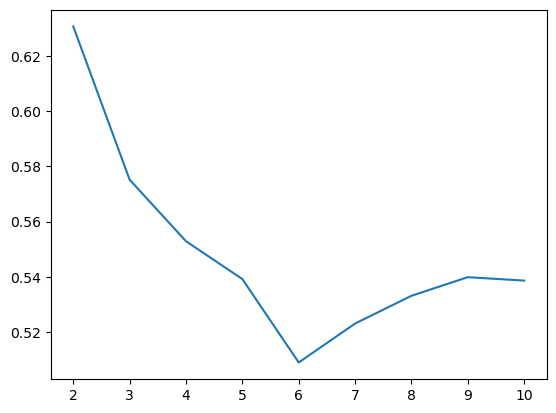

In [96]:
#Utilisez maintenant le score de silhouette pour déterminer le nombre optimal de partitions :

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
for n in range(2, 11, 1):
    km = KMeans( n_clusters=n, random_state = 808, n_init = 10)
    km.fit(X)
    labels_ = km.predict(X)
    scores.append(silhouette_score(X,labels_ ))

plt.plot(range(2, 11, 1), scores)

Résultat: le graph montre que le nombre optimal de clusters est de 2; silhouette_score ~ 1